In [121]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import pyBigWig
import numpy as np

In [122]:
ez=pd.read_csv('data/ez.csv',index_col=0,engine='c')
exp=pd.read_csv('data/exp.csv',index_col=0,engine='c')

In [3]:
#h=pd.read_csv('data/h.csv',index_col=0,engine='c')
#ez=ez.merge(h,left_index=True,right_index=True)

In [124]:
df=pd.read_csv('data/meth/fib_all.csv',index_col=0,engine='c')
df.shape

(25606034, 5)

In [125]:
fs=[c.strip('.meth') for c in df.columns]
df.columns=fs

In [ ]:
ind=pd.read_csv('data/ind.csv',index_col=0,engine='c')
df=df.merge(ind[['d','gene']],left_index=True,right_index=True)
#ind=ind.merge(ez,left_index=True, right_index=True)

In [ ]:
df.d.hist(bins=100)

In [127]:
df['s']=df[fs].sum(1)
df=df[df.s>0]
df=df[df.s<len(fs)]
df=df.drop('s',axis=1).round(3)
print(df.shape)

(23003874, 5)


In [ ]:
df.d.hist(bins=100)

In [132]:
df['d']=df['SRR3264722']-df['SRR3264413']

In [134]:
df['ch']=df.index.str.split('_').str[0]

In [157]:
df['m']=df.d.rolling(1000).mean()

In [160]:
d7=df[df.ch=='6']

<AxesSubplot:>

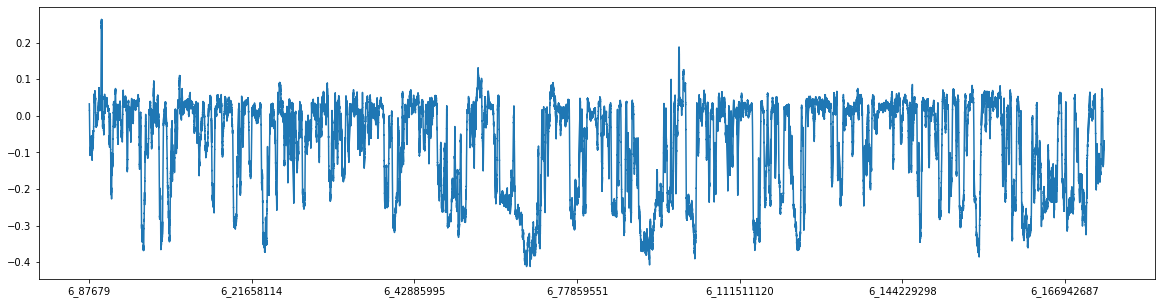

In [161]:
d7.m.plot(figsize=(20,5))

In [162]:
d7.sort_values('m')

,SRR3264413,SRR3264414,SRR3264415,SRR3264416,SRR3264722,d,ch,m
6_66948396,0.600,0.579,0.417,0.083,0.167,-0.433,6,-0.411411
6_66948366,0.833,0.778,0.833,0.444,0.167,-0.666,6,-0.411312
6_67859685,0.643,0.800,0.667,0.143,0.067,-0.576,6,-0.411303
6_67860268,0.571,0.400,0.467,0.167,0.118,-0.453,6,-0.411089
6_67860567,0.688,0.400,0.571,0.118,0.083,-0.605,6,-0.410988
...,...,...,...,...,...,...,...,...
6_1417491,1.000,0.800,0.800,0.833,1.000,0.000,6,0.263051
6_1414875,0.833,0.846,1.000,1.000,1.000,0.167,6,0.263092
6_1414291,0.923,1.000,1.000,1.000,1.000,0.077,6,0.263156
6_1413281,0.545,0.143,0.000,0.571,0.625,0.080,6,0.263164


In [174]:
d7.iloc[14155:15155]

,SRR3264413,SRR3264414,SRR3264415,SRR3264416,SRR3264722,d,ch,m
6_1365612,0.222,0.250,0.200,0.000,0.000,-0.222,6,0.037031
6_1365779,0.125,0.294,0.222,1.000,0.923,0.798,6,0.037972
6_1365786,0.312,0.500,0.636,1.000,0.900,0.588,6,0.038393
6_1365808,0.450,0.562,0.583,0.556,0.571,0.121,6,0.038514
6_1365812,0.300,0.294,0.455,0.444,0.385,0.085,6,0.038516
...,...,...,...,...,...,...,...,...
6_1417318,0.857,1.000,1.000,0.778,0.857,0.000,6,0.262129
6_1417370,0.833,1.000,0.857,1.000,1.000,0.167,6,0.262229
6_1417381,0.875,0.857,1.000,1.000,1.000,0.125,6,0.262722
6_1417488,0.667,0.600,0.833,1.000,0.857,0.190,6,0.262989


In [169]:
d7.index.get_loc('6_1417516')

15155

In [9]:
df=df.merge(ez,left_index=True,right_index=True)

In [10]:
df=df.merge(exp['e_fib'].rename('e'),left_index=True,right_index=True)

In [57]:
p=pd.DataFrame(dg.mean()[fs])
p['passage']=[4,7,10,31,33]
p

,0
SRR3264413,0.142089
SRR3264414,0.105885
SRR3264415,0.141516
SRR3264416,0.212110
SRR3264722,0.227076


<AxesSubplot:xlabel='passage', ylabel='0'>

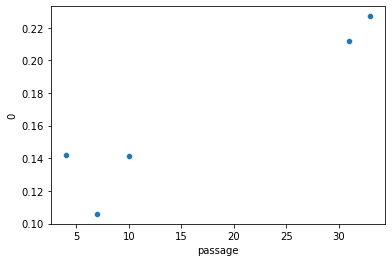

In [58]:
sns.scatterplot(data=p,x='passage',y=0)

In [59]:
p.corr()

,0,passage
0,1.000000,0.945393
passage,0.945393,1.000000


In [118]:
v='data/1-s2.0-S0092867413004649-mmc6.xlsx'
v=pd.read_excel(v,sheet_name='H1_DMVs')
v.to_csv('data/v.bed18',header=None, index=None,sep='\t')
v=pd.read_table('data/v38.bed',header=None)
v=v[v[0]!='chrX'].copy()
v['ch']=v[0].str[3:].astype(int)
v['b']=v['ch']*10**9+v[1]
v['e']=v['ch']*10**9+v[2]
v['r']=v.apply(lambda x:set(range(x['b'],x['e'])),axis=1)
vr=set.union(*v.r)

In [154]:
df['ch']=df.index.str.split('_').str[0]
df=df[~df.ch.isin(['M','X','Y'])]
df['g']=df.ch.astype(int)*10**9+df.index.str.split('_').str[1].astype(int)
dg=df[df.g.isin(vr)]
dg.shape

(112098, 7)

In [156]:
p=pd.DataFrame(dg.mean()[fs])
p['passage']=[4,7,10,31,33]
p

,0,passage
SRR3264413,0.229196,4
SRR3264414,0.234260,7
SRR3264415,0.243773,10
SRR3264416,0.315962,31
SRR3264722,0.319735,33


                0   passage
0        1.000000  0.998785
passage  0.998785  1.000000


<AxesSubplot:xlabel='passage', ylabel='0'>

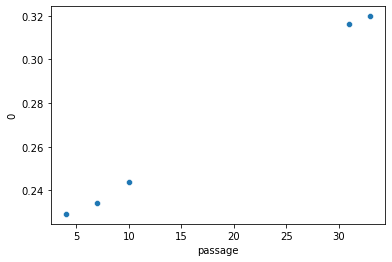

In [159]:
print(p.corr())
sns.scatterplot(data=p,x='passage',y=0)

In [5]:
v='https://static-content.springer.com/esm/art%3A10.1186%2Fs13059-018-1492-3/MediaObjects/13059_2018_1492_MOESM3_ESM.xls'
v=pd.read_excel(v,sheet_name='Supplementary Table 2.txt',skiprows=1)

In [11]:
v=v[v['UMR category']=='Canyon'].sort_values('Length (bp)',ascending=False)
v['gene']=v['closest gene name'].astype(str)
v=v[~v.gene.str.contains('2016')].copy()
v['s']=v['start'].astype(int)
v['e']=v['end'].astype(int)
v[['chr','s','e','gene']].to_csv('data/v/can19.bed',sep='\t',header=None,index=None)

In [81]:
v=pd.read_table('data/v/can38.bed',header=None)
v=v[v[0]!='chrX'].copy()
v=v[~(v[0].isin(['chrX','chrY']))&~(v[0].str.contains('rand'))]
v['ch']=v[0].str[3:].astype(int)
v['b']=v['ch']*10**9+v[1]
v['e']=v['ch']*10**9+v[2]
v['r']=v.apply(lambda x:set(range(x['b'],x['e'])),axis=1)
vr=set.union(*v.r)
len(vr)

14544231

In [85]:
df['ch']=df.index.str.split('_').str[0]
df=df[~df.ch.isin(['M','X','Y'])]
df['g']=df.ch.astype(int)*10**9+df.index.str.split('_').str[1].astype(int)
dg=df[df.g.isin(vr)]
dg.shape

(577114, 7)

In [86]:
p=pd.DataFrame(dg.mean()[fs])
p['passage']=[4,7,10,31,33]
p

,0,passage
SRR3264413,0.093103,4
SRR3264414,0.095475,7
SRR3264415,0.099525,10
SRR3264416,0.121382,31
SRR3264722,0.123234,33


                0   passage
0        1.000000  0.999702
passage  0.999702  1.000000


<AxesSubplot:xlabel='passage', ylabel='0'>

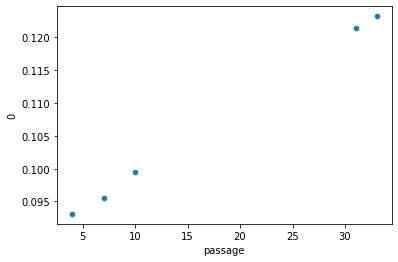

In [88]:
print(p.corr())
sns.scatterplot(data=p,x='passage',y=0)

In [96]:
v='https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-021-25521-7/MediaObjects/41467_2021_25521_MOESM6_ESM.xlsx'
v=pd.read_excel(v,sheet_name='canyon_CD3_Tcell',skiprows=0)
len(v)


1733

In [98]:
v=v[['canyon_position','Category']].drop_duplicates()

In [103]:
v['ch']=v['canyon_position'].str.split(':').str[0]
v=v[~v['ch'].isin(['chrX','chrY'])].copy()

In [114]:
v['s']=v['canyon_position'].str.split(':').str[1].str.split('-').str[0].astype(int)
v['e']=v['canyon_position'].str.split(':').str[1].str.split('-').str[1].astype(int)

In [117]:
v[['ch','s','e','Category']].to_csv('data/v/pcan19.bed',sep='\t',header=None,index=None)